# **SyriaTel Customer Churn Prediction**
### **Business Understanding**
For this project we have create a model to predict customer churn for SyriaTel, which is a telecom organization where they are losing customers.This will be done by modelling machine learning into our project.
Machine learning being intergrating here is important due to complexity in data, greater prediciton accuracy and since the dataset has several features MAchine Learning is able to handle the high dimension data and is better than the older statistical methods for prediction.

Problem Statement: Customer churning leads to quite some revenue loss for telecom business because of the high substansial loss of customers which affects their reputation and brand. Predicting the churn, the company can dynamically put retention strategies, like promotions or making customer service better for customers at risk of leaving. In the real world unfortunately, trying to keep your customers becomes more expensive than getting new ones and we can't afford to lose any clients.

**Stakeholders:**


*   Telecommunications company
*   Business executives
* Customer Support
* Marketers


**Objective:**

Implement predicitve model to identify clients at risk of churning.

Model to give insights to target specific customers at a time so as to improve the marketting and retain clients leading to customer satisfaction.

**Conclusion**

The predictive model helps in controlling the issue of customer retention which is a real time problem in telecommincations companies today. The predictions aims at helping the stakeholders to increase customer retention thus bringing loyalty in clients.


Target Variable:

Churn (T/F)
Metric:

F1 Score (Precision and recall, especially important if the dataset is imbalanced)

Now that we have the business understanding.
In this notebook, we shall follow this structure;

1. Data understanding.
2. Data preparation
3. modelling
4. Evaluation

In [88]:
# ## 📥 Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [89]:
#Load the dataset
file_path = '/content/bigml_59c28831336c6604c800002a.csv'
data = pd.read_csv(file_path)

**Data Understanding**

**Data source**

The dataset for this project is taken from Kaggle competition. It has information on customers of a telecommunications company.

The purpose of this project is at retaining customers and so this dataset makes it suitable. In the dataset we have enough features to help in the prediction of customers churnning. We can create a predictive model which can help in creating retention strategies.

Let's look into the data by uderstanding its structure(shape). The dataset has (3333,21) rows, columns respectively.

In the code lets get an understanding of the first few rows and descriptive statistics of the data.

**Data Limitations.**

Imbalances in the classes which gives biased models affecting the model training.

Missing data so as to not affect the quality of the data modelling.

Data won't account for seasonal trends or whether the market changes with new technologies.

In [90]:
#Show few rows of DF
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [91]:
#Get data structure
print("DF shape:", data.shape)
print("Columns in the DF:", data.columns)

DF shape: (3333, 21)
Columns in the DF: Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [92]:
# Display descriptive statistics
descriptive_stats = data.describe(include='all')
print(descriptive_stats)

       state  account length    area code phone number international plan  \
count   3333     3333.000000  3333.000000         3333               3333   
unique    51             NaN          NaN         3333                  2   
top       WV             NaN          NaN     382-4657                 no   
freq     106             NaN          NaN            1               3010   
mean     NaN      101.064806   437.182418          NaN                NaN   
std      NaN       39.822106    42.371290          NaN                NaN   
min      NaN        1.000000   408.000000          NaN                NaN   
25%      NaN       74.000000   408.000000          NaN                NaN   
50%      NaN      101.000000   415.000000          NaN                NaN   
75%      NaN      127.000000   510.000000          NaN                NaN   
max      NaN      243.000000   510.000000          NaN                NaN   

       voice mail plan  number vmail messages  total day minutes  \
count  

In [93]:
# Look for missing values
missing_values = data.isnull().sum()
print("Missing values according to columns:")
print(missing_values[missing_values > 0])


Missing values according to columns:
Series([], dtype: int64)


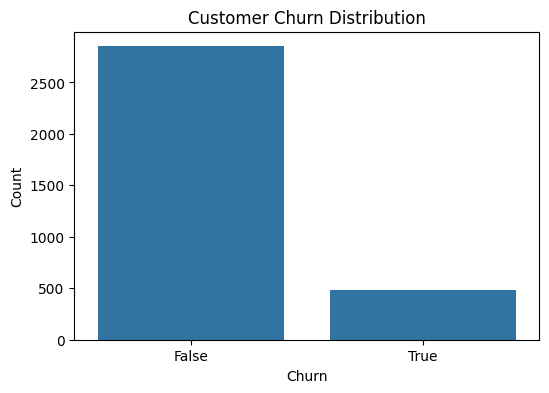

In [94]:
# Create plot for churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=data)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

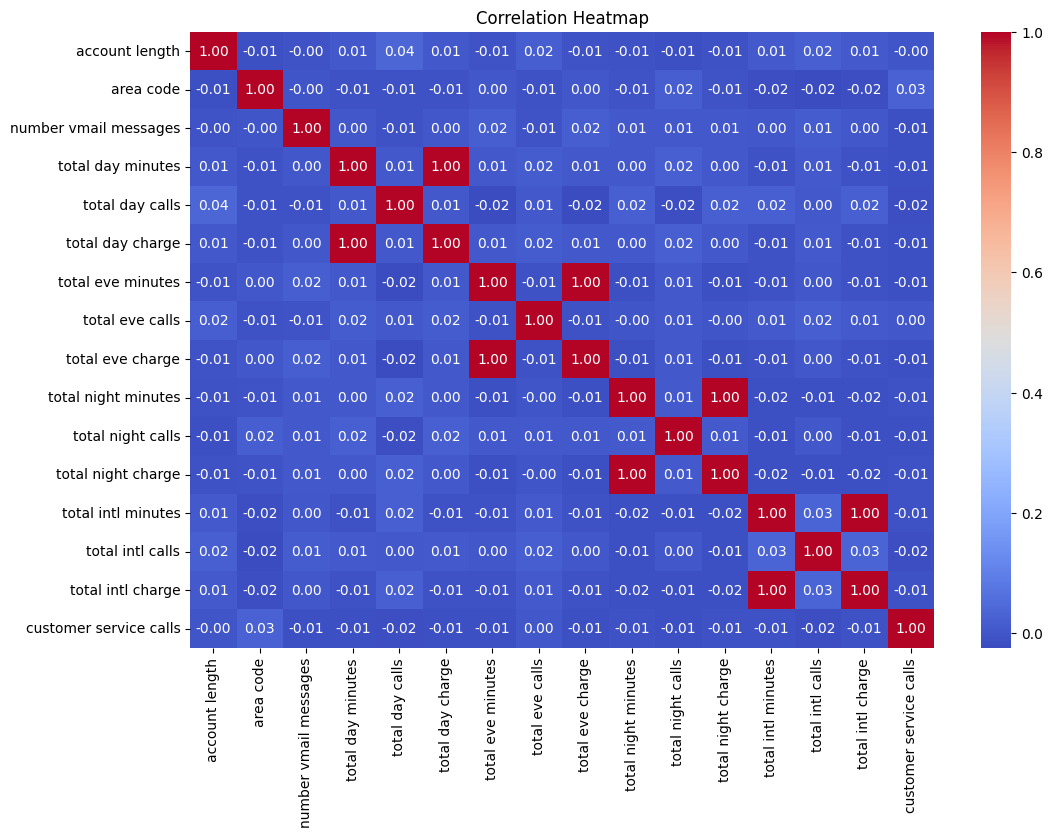

In [95]:
# Create heatmap
num_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

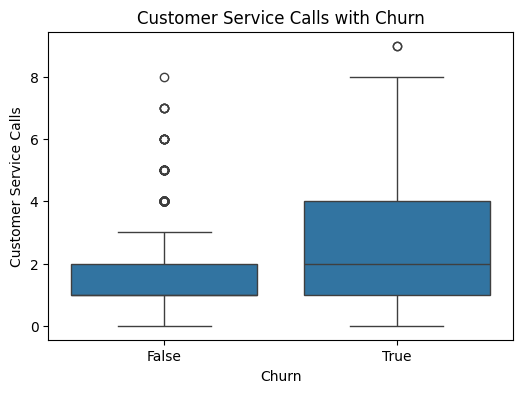

In [96]:
#Create figure on customer service calls with churn
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='customer service calls', data=data)
plt.title('Customer Service Calls with Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

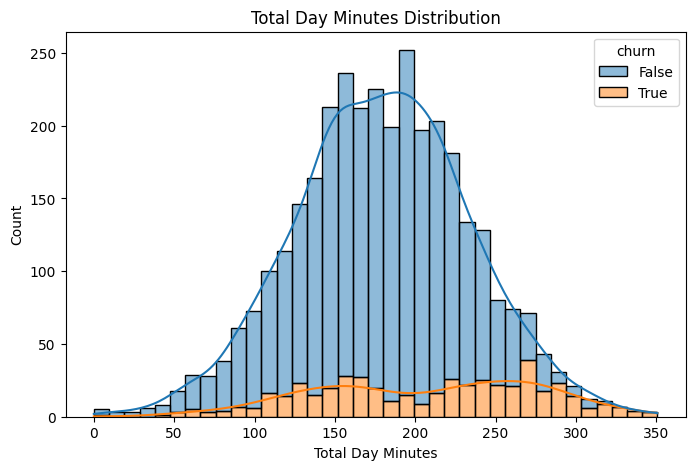

In [97]:
# Create plot of total day minutes by churn
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='total day minutes', hue='churn', kde=True, multiple='stack')
plt.title('Total Day Minutes Distribution')
plt.xlabel('Total Day Minutes')
plt.ylabel('Count')
plt.show()

Data preparation

In [98]:
# Convert 'churn' to a binary
data['churn'] = data['churn'].astype(int)

In [99]:
#Identify the independent and dependent variable.
#Drop 'phone number' not important for the modeling.
X = data.drop(['churn', 'phone number'], axis=1)
y = data['churn']

In [100]:
# Identify categorical and numerical features
categor_feature = X.select_dtypes(include=['object']).columns
num_feature = X.select_dtypes(exclude=['object']).columns
#Output the features.
print("Categorical Features:", categor_feature)
print("Numerical Features:", num_feature)

Categorical Features: Index(['state', 'international plan', 'voice mail plan'], dtype='object')
Numerical Features: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


In [101]:
#Use ColumnTransformer to apply one-hot encoding to categorical variables and scaling to numerical features.
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        #Scale on number feature and one hot encode on categorical.
        ('num', StandardScaler(), num_feature),
        ('cat', OneHotEncoder(), categor_feature)
    ])

In [102]:
# Split the dataset into training and testing sets of 20% test and 80% train with random state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2666, 19)
Testing set shape: (667, 19)


# **Data Modelling**
Preparation of data is done and dataset has been split into train and test after initializing the x&y variables.
Now we move into the data modelling. We shall be using the following models:
1. Random Forest model
2. logistic Regression model(baseline model)
3. Decision tree model.

We have used 3 different models because in the final section we shall do an evaluation to see which model fits best for the prediction.

Once we have introduced the 3 models, you will see the accuracy score for each;


*   Logistic regression - 85.2%  accuracy.
*   Random Tree - 94.3%  accuracy
* Decision tree - 92.7%  accuracy

**Conclusion**

This outlines that the logistic regression is a good baseline model however has some imbalances issues potentially. Decision tree has a better accuracy than the baseline model showing its better in classification however Random tree had the highest accuracy than all the other models giving better improvement and much more recommended for recognition and data modelling.



In [112]:
from sklearn.linear_model import LogisticRegression

# 2. Logistic Regression
# Create a pipeline for Logistic Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))  # Increase max_iter if needed
])

# Train the Logistic Regression model
pipeline_lr.fit(X_train, y_train)

# Make predictions with the Logistic Regression model
y_pred_lr = pipeline_lr.predict(X_test)

# Print accuracy for Logistic Regression
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.8515742128935532


Took some help on this from a relative and online resources for the random forest model.

In [113]:
from sklearn.model_selection import GridSearchCV
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               scoring='f1', cv=5, n_jobs=-1)
# Create a pipeline for Random Forest with Grid Search
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', grid_search_rf)   # Use GridSearchCV for hyperparameter tuning
])

# Train the Random Forest model with hyperparameter tuning
pipeline_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print("Best parameters for Random Forest:", best_params_rf)
print("Best cross-validated F1 score for Random Forest:", best_score_rf)

# Make predictions with the best Random Forest model
y_pred_rf = pipeline_rf.predict(X_test)

# Print accuracy for Random Forest
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validated F1 score for Random Forest: 0.7619693947525343
Accuracy: 0.9430284857571214


In [111]:
from sklearn.tree import DecisionTreeClassifier

# 3. Decision Tree
# Create a pipeline for Decision Tree
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', DecisionTreeClassifier(random_state=42))  # Default parameters
])

# Train the Decision Tree model
pipeline_dt.fit(X_train, y_train)

# Make predictions with the Decision Tree model
y_pred_dt = pipeline_dt.predict(X_test)

# Print accuracy for Decision Tree
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Accuracy: 0.9265367316341829


# **Model evaluation.**
This is the final step on this notebook.

Metrics justification to real world.

The main objective in this project is to predict customers churning. Predicting the clients who are looking at churning helps to improve the retention and reduce the revenue loss and not tanish the telecom company reputation.


We shall be using the following metrics so as to evaluate the models performance so as to identify the most suitable;


1.   Accuracy -  This is how close a measurement is to the true or accepted value. Helps to understand overall correctness.
2.   F1 Score - This is an evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model.
3. Precision - This how close measurements of the same item are to each other. Higher precission show less risk of retentions.
4. Recall - This is a performance metrics that apply to data retrieved from a collection, corpus or sample space. This will be used in idetifying the churners. High recall shows the clients that are most likely to churn.

There can be consequntial error when the model predicts a customer will churn however this doesn't happen, so this leads to waste of resource and retention measures which aren't needed this is a type I error.





In [115]:
# Print evaluation metrics for Logistic Regression
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.53      0.18      0.27       101

    accuracy                           0.85       667
   macro avg       0.70      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



In [114]:
# Print evaluation metrics for Random Forest
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       566
           1       0.96      0.65      0.78       101

    accuracy                           0.94       667
   macro avg       0.95      0.82      0.87       667
weighted avg       0.94      0.94      0.94       667



In [116]:
# Print evaluation metrics for Decision Tree
print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       566
           1       0.77      0.73      0.75       101

    accuracy                           0.93       667
   macro avg       0.86      0.85      0.85       667
weighted avg       0.93      0.93      0.93       667



Model Performance evaluation.


Lets look into the performance with the current results.



1. L**ogistic Regression**

  - Precision (Churn = 1): 0.53

  - Recall (Churn = 1): 0.18

  - F1-Score (Churn = 1): 0.27

  Accuracy: 85.2%


2.   **Random Forest Classifier**



   - Precision (Churn = 1): 0.96

   - Recall (Churn = 1): 0.65

   - F1-Score (Churn = 1): 0.78

   - Accuracy: 94.3%



3. **Decision Tree Classifier**



  - Precision (Churn = 1): 0.77

  -  Recall (Churn = 1): 0.73

  - F1-Score (Churn = 1): 0.75

  - Accuracy: 92.7%


Selection of the final model: Looking into the 3 various models that we have used it is reasonable to say that the Random Forest is the most suitable based on its performance with an accuracy of 94.3% highest out of the models, precision of 0.96 and a recall of 0.65.

We used a holdout test data for all models and Random Forest had thee highest precision of 0.96 showing most of churners predicted here are churners in fact. However this model needs some more improvements as it misses about 35% of the actual churners in recall and  a good F1 score of 0.78 showing a good stability between the precision and recall.

The model gives a strong tool for the prediction by identifying the at risk customers looking at churning. The precision results are signifacntly high showing we can trust the model predictions but the recall signifies that we could do more improvements.

In the future we can look at additional features to fine tune the model to get better recall value without affecting the precision.

Final, the model shows its able to address the real worl problems in te telecommunications industry for the stakeholders.